<a href="https://colab.research.google.com/github/dhasaf/unity-project1/blob/main/HotelReservations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Reservations**
Our goal is to build unsupervised Natural Language Processing (NLP) machine learning models to predict whether a customer is going to honor the reservation or cancel it. 

## **Import Libaries**

In [76]:
import matplotlib as plt 
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import os
import tarfile
import urllib

### **Read data**

In [77]:
hoteldata = pd.read_csv("Hotel Reservations.csv")
hoteldata.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### **View the data**

In [78]:
hoteldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Convert categorical data into Numeric

In [79]:
hoteldata['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [80]:
##convert meal plan
def meal_plan_convert(row):
    if row.type_of_meal_plan == 'Not Selected':
        return 0
    elif row.type_of_meal_plan == 'Meal Plan 1':
        return 1
    elif row.type_of_meal_plan == 'Meal Plan 2':
        return 2
    else:
        return 3

hoteldata['type_of_meal_plan'] = hoteldata.apply(meal_plan_convert, axis=1)
hoteldata.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,0,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,0,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [81]:
hoteldata['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [82]:
room_type_reserved_mapping = {'Room_Type 1':1, 'Room_Type 2':2, 'Room_Type 3':3, 'Room_Type 4':4, 'Room_Type 5':5, 'Room_Type 6':6,'Room_Type 7':7, }
hoteldata['room_type_reserved'] = hoteldata['room_type_reserved'].map(room_type_reserved_mapping)
hoteldata.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [83]:
hoteldata['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [84]:
market_segment_type_mapping = {'Online':1, 'Offline':2, 'Corporate':3, 'Complementary':4, 'Aviation':5}
hoteldata['market_segment_type'] = hoteldata['market_segment_type'].map(market_segment_type_mapping)
hoteldata['market_segment_type'].value_counts()

1    23214
2    10528
3     2017
4      391
5      125
Name: market_segment_type, dtype: int64

In [85]:
hoteldata['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [86]:
booking_status_mapping = {'Not_Canceled':0, 'Canceled':1}
hoteldata['booking_status'] = hoteldata['booking_status'].map(booking_status_mapping)
hoteldata.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,2,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


In [87]:
hoteldata.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.949966,0.030986,1.708890,85.232557,2017.820427,7.423653,15.596995,1.447553,0.025637,0.023349,0.153411,103.423539,0.619655,0.327636
std,0.518715,0.402648,0.870644,1.410905,0.480191,0.173281,1.399851,85.930817,0.383836,3.069894,8.740447,0.681536,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2017.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,17.000000,2018.000000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,1.000000,0.000000,1.000000,126.000000,2018.000000,10.000000,23.000000,2.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,7.000000,443.000000,2018.000000,12.000000,31.000000,5.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


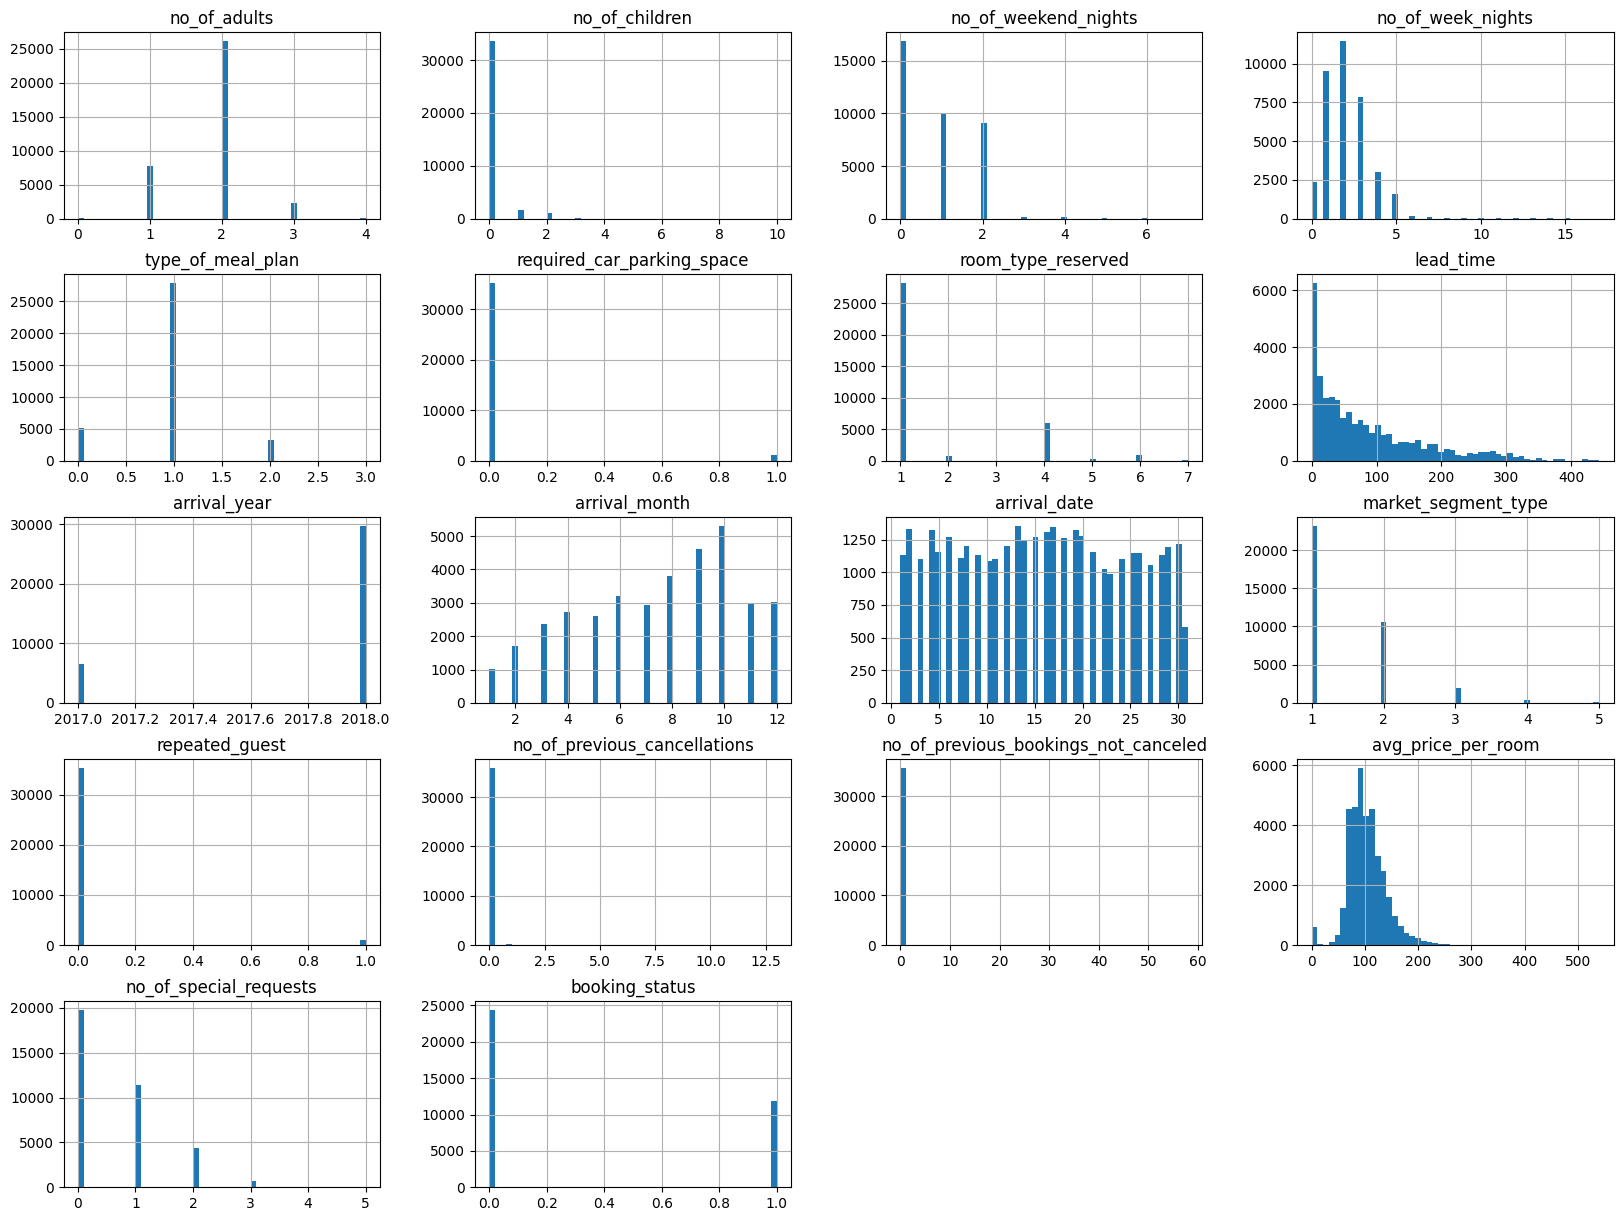

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
hoteldata.hist(bins= 50, figsize=(20,15))
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(hoteldata, test_size=0.2, random_state=42)
print("Training data size: ",len(train_set))
print("Testing data size: ",len(test_set))

Training data size:  29020
Testing data size:  7255


In [90]:
hoteldata['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [91]:
##hoteldata["previos_canc"] = pd.cut(hoteldata["no_of_previous_cancellations"],bins=[0.,1.5,3.0,4.5,6., np.inf],labels=[1,2,3,4,5])
##hoteldata["previos_canc"].hist()

In [92]:
hoteldata['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [93]:
hoteldata.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [95]:
hoteldata.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [96]:
hoteldata.drop(["Booking_ID","arrival_year"],axis = 1, inplace = True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='no_of_previous_cancellations', ylabel='booking_status'>

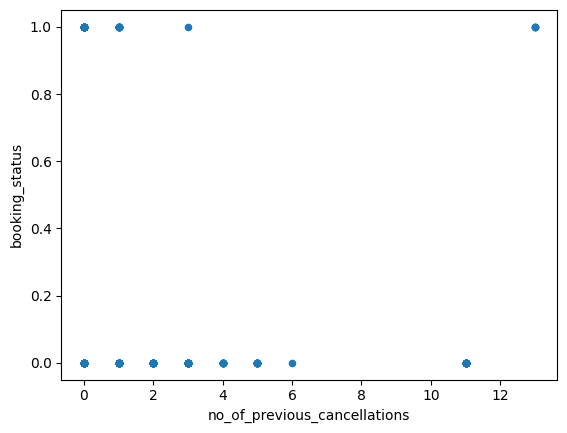

In [94]:
##hoteldata.plot(kind="scatter", x="no_of_previous_cancellations", y="")

In [97]:
hoteldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  int64  
 11  repeated_guest 

## **Correlation**

In [98]:
corr_matrix = hoteldata.corr()
corr_matrix["booking_status"].sort_values(ascending=False)

booking_status                          1.000000
lead_time                               0.438538
avg_price_per_room                      0.142569
no_of_week_nights                       0.092996
no_of_adults                            0.086920
no_of_weekend_nights                    0.061563
type_of_meal_plan                       0.049374
no_of_children                          0.033078
room_type_reserved                      0.022986
arrival_date                            0.010629
arrival_month                          -0.011233
no_of_previous_cancellations           -0.033728
no_of_previous_bookings_not_canceled   -0.060179
required_car_parking_space             -0.086185
repeated_guest                         -0.107287
market_segment_type                    -0.136008
no_of_special_requests                 -0.253070
Name: booking_status, dtype: float64

In [99]:
corr_matrix

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.019787,0.103316,0.105622,-0.004139,0.011429,0.270348,0.097287,0.021841,0.026338,-0.314103,-0.192277,-0.047426,-0.119166,0.296886,0.189401,0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.042216,0.034244,0.364073,-0.047091,-0.003076,0.025482,-0.130618,-0.036348,-0.016390,-0.021189,0.337728,0.124486,0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.018762,-0.031111,0.057368,0.046595,-0.009894,0.027304,-0.129069,-0.067107,-0.020690,-0.026312,-0.004525,0.060593,0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,0.026888,-0.048784,0.094125,0.149650,0.037376,-0.009305,-0.112952,-0.099764,-0.030080,-0.049344,0.022753,0.045994,0.092996
type_of_meal_plan,-0.004139,0.042216,-0.018762,0.026888,1.000000,-0.015161,0.093410,0.226712,0.017222,0.015952,0.254926,0.010001,-0.006799,0.006331,0.134703,-0.090276,0.049374
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,-0.015161,1.000000,0.038778,-0.066445,-0.015505,-0.000037,0.003723,0.110909,0.027106,0.063810,0.061304,0.087922,-0.086185
room_type_reserved,0.270348,0.364073,0.057368,0.094125,0.093410,0.038778,1.000000,-0.107793,-0.005967,0.032919,-0.156610,-0.025826,-0.007936,-0.008139,0.469899,0.145041,0.022986
lead_time,0.097287,-0.047091,0.046595,0.149650,0.226712,-0.066445,-0.107793,1.000000,0.136814,0.006479,0.006933,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645,0.438538
arrival_month,0.021841,-0.003076,-0.009894,0.037376,0.017222,-0.015505,-0.005967,0.136814,1.000000,-0.042780,0.006311,0.000341,-0.038615,-0.010718,0.054423,0.110552,-0.011233
arrival_date,0.026338,0.025482,0.027304,-0.009305,0.015952,-0.000037,0.032919,0.006479,-0.042780,1.000000,-0.011649,-0.015949,-0.012542,-0.001498,0.017898,0.018352,0.010629


array([[<Axes: xlabel='booking_status', ylabel='booking_status'>,
        <Axes: xlabel='lead_time', ylabel='booking_status'>,
        <Axes: xlabel='avg_price_per_room', ylabel='booking_status'>,
        <Axes: xlabel='no_of_week_nights', ylabel='booking_status'>],
       [<Axes: xlabel='booking_status', ylabel='lead_time'>,
        <Axes: xlabel='lead_time', ylabel='lead_time'>,
        <Axes: xlabel='avg_price_per_room', ylabel='lead_time'>,
        <Axes: xlabel='no_of_week_nights', ylabel='lead_time'>],
       [<Axes: xlabel='booking_status', ylabel='avg_price_per_room'>,
        <Axes: xlabel='lead_time', ylabel='avg_price_per_room'>,
        <Axes: xlabel='avg_price_per_room', ylabel='avg_price_per_room'>,
        <Axes: xlabel='no_of_week_nights', ylabel='avg_price_per_room'>],
       [<Axes: xlabel='booking_status', ylabel='no_of_week_nights'>,
        <Axes: xlabel='lead_time', ylabel='no_of_week_nights'>,
        <Axes: xlabel='avg_price_per_room', ylabel='no_of_week_nights'

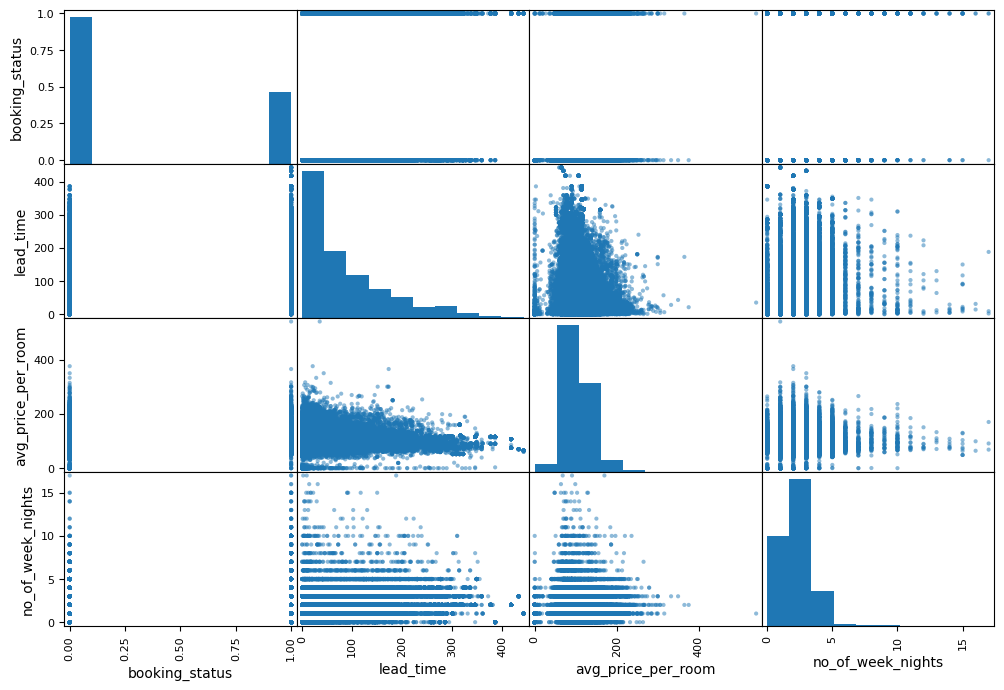

In [100]:
from pandas.plotting import scatter_matrix
attributes=["booking_status","lead_time","avg_price_per_room","no_of_week_nights"]
scatter_matrix(hoteldata[attributes], figsize=(12,8))

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='lead_time', ylabel='booking_status'>

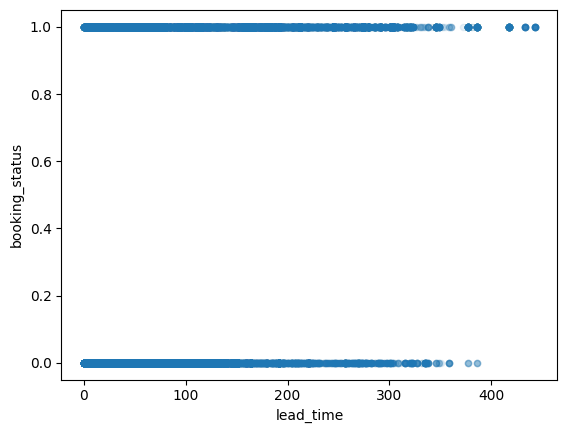

In [101]:
hoteldata.plot(kind="scatter",x="lead_time",y="booking_status", alpha=0.1)

In [103]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(hoteldata[['booking_status']]).toarray())
enc_data.head() 

,0,1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
